In [7]:
import matplotlib
import numpy as np
import scipy as scp
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle

import pdb

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import scipy as scp

from sklearn.pipeline import Pipeline
from transform_scatt import load_vertical_transform, Concat_scat_tree, Concat_scal, JointScat
from compute_features import compute_features, load_features
from plot_utils import plot_confusion_matrix

In [2]:
nOctaves = 10
nfo = 12
nfo2 = 12
n_classes = 50
n_itemsbyclass = 10
    
def load_X_l2(q2, j2, directory, n_classes, n_itemsbyclass):
    files = [f for f in os.listdir(directory)]
    classes = 0
    X = []
    y = []
    for filename in sorted(files)[:n_classes]:
        print(filename)
        with open(os.path.join(directory, filename), 'rb') as f:
            data = pickle.load(f)
            
        X_class = [x[2][:j2*nfo,j2*nfo2+q2,:] for x in data]
        X.extend(X_class[:n_itemsbyclass])
        y.extend([classes for _ in range( \
            min(n_itemsbyclass,len(data)))])
        classes += 1
    return np.concatenate(X, axis=1), np.array(y)

X, y = load_X_l2(6,5, "/users/data/blier/features_esc50/scat_10_12_6/", n_classes, n_itemsbyclass)
X_real = (X.real).T
X_imag = (X.imag).T
print(X_real.shape)

101 - Dog.pkl
102 - Rooster.pkl
103 - Pig.pkl
104 - Cow.pkl
105 - Frog.pkl
106 - Cat.pkl
107 - Hen.pkl
108 - Insects.pkl
109 - Sheep.pkl
110 - Crow.pkl
201 - Rain.pkl
202 - Sea waves.pkl
203 - Crackling fire.pkl
204 - Crickets.pkl
205 - Chirping birds.pkl
206 - Water drops.pkl
207 - Wind.pkl
208 - Pouring water.pkl
209 - Toilet flush.pkl
210 - Thunderstorm.pkl
301 - Crying baby.pkl
302 - Sneezing.pkl
303 - Clapping.pkl
304 - Breathing.pkl
305 - Coughing.pkl
306 - Footsteps.pkl
307 - Laughing.pkl
308 - Brushing teeth.pkl
309 - Snoring.pkl
310 - Drinking - sipping.pkl
401 - Door knock.pkl
402 - Mouse click.pkl
403 - Keyboard typing.pkl
404 - Door - wood creaks.pkl
405 - Can opening.pkl
406 - Washing machine.pkl
407 - Vacuum cleaner.pkl
408 - Clock alarm.pkl
409 - Clock tick.pkl
410 - Glass breaking.pkl
501 - Helicopter.pkl
502 - Chainsaw.pkl
503 - Siren.pkl
504 - Car horn.pkl
505 - Engine.pkl
506 - Train.pkl
507 - Church bells.pkl
508 - Airplane.pkl
509 - Fireworks.pkl
510 - Hand saw.pkl

In [27]:
pca1 = PCA(n_components=40)
print("test")
pca1.fit(X_real)

test


PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
comp = pca1.components_

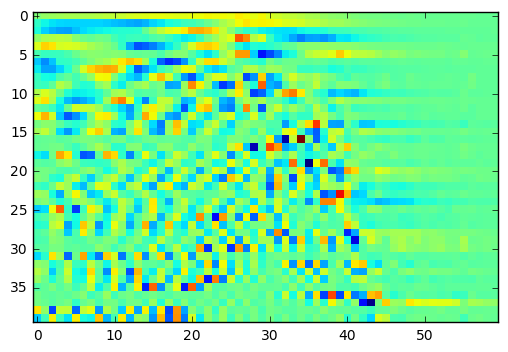

In [29]:
plt.imshow(comp, interpolation='nearest')

In [34]:
comp_f = scp.fftpack.fft(comp, axis=1)

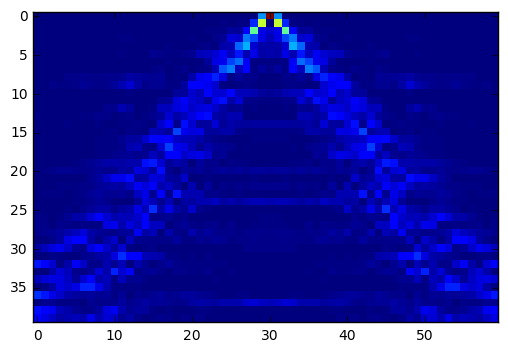

In [36]:
plt.imshow(np.roll(np.abs(comp_f)**2, comp_f.shape[1]//2, axis=1) , interpolation='nearest')

In [24]:
comp_f.dtype

dtype('complex128')